let's try to classify the stories of small length
----------------------------------------------

In [1]:
from os import listdir
from os.path import isfile, join
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from json import loads
from re import findall,UNICODE
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from database.bookclass import Book_raw_data

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *

loading LabMT with stopVal=0.0, for 10222 words


In [2]:
# all our essentials
from matplotlib import rc,rcParams
# rc('font', family='sans-serif') 
# rc('font', serif='Helvetica Neue')
# rc('text', usetex='false') 

# rc('font', family='serif')
# rc('font', family='cmr10')
# rc('text', usetex='true') 

rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
q = Book.objects.filter(exclude=False,length__gt=10000,length__lte=200000,downloads__gte=150,numUniqWords__gt=1000,numUniqWords__lt=18000,lang_code_id=0)

11237
29258
4023
0
4743836
[511384, 513735, 518327, 518339, 521637, 522736, 537855, 545277, 548430, 548696, 558440, 562206, 562827, 567197, 579090, 584965, 594952, 623528, 660901, 731505, 733286, 798299, 804131, 833210, 882307, 920915, 926276, 965072, 986467, 1022704, 1031492, 1046216, 1137940, 1143458, 1186474, 1187569, 1218964, 1257259, 1280252, 1297106, 1298431, 1367402, 1414700, 1438698, 1608621, 1633422, 1670955, 2568127, 2613623, 4743836]


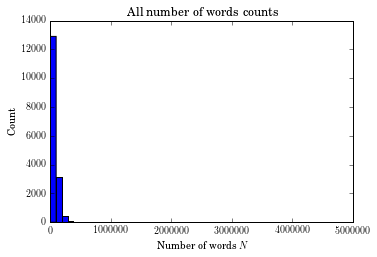

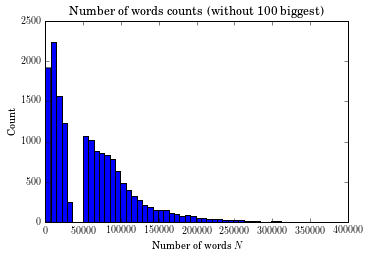

In [24]:
# check if the length information is in there...
print(Book.objects.all()[0].filename)
print(Book.objects.all()[0].length)
print(Book.objects.all()[0].numUniqWords)
print(len(Book.objects.filter(length__gte=30000,length__lte=50000,language='English',exclude=False)))
allLengths = [book.length for book in Book.objects.filter(language='English',exclude=False)]
print(max(allLengths))
allLengths.sort()
# there are some huge outliers:
print(allLengths[-50:])
# so just look at the beginning
# plt.hist(allLengths[:-50],normed=False,bins=50)
fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.hist(allLengths,normed=False,bins=50)
ax.set_xlabel('Number of words $N$')
ax.set_ylabel('Count')
ax.set_title("All number of words counts")
# mysavefig('unique-words.png')
mysavefig('word-counts-all.pdf',date=True,folder="media/figures")

fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.hist(allLengths[:-100],normed=False,bins=50)
ax.set_xlabel('Number of words $N$')
ax.set_ylabel('Count')
ax.set_title("Number of words counts (without 100 biggest)")
mysavefig('word-counts-less-top100.pdf',date=True,folder="media/figures")

11237
29258
4023
0
297005
[31176, 31198, 31457, 31570, 32083, 32534, 32602, 32627, 32825, 33255, 33345, 33457, 33583, 33815, 34567, 34957, 35005, 35067, 35116, 35135, 35584, 35661, 36609, 36715, 36966, 36976, 37223, 37593, 37604, 37727, 39045, 40861, 42123, 44468, 44852, 45205, 45736, 47775, 47777, 48612, 48840, 55713, 56020, 59122, 62337, 69750, 73987, 101429, 125639, 297005]


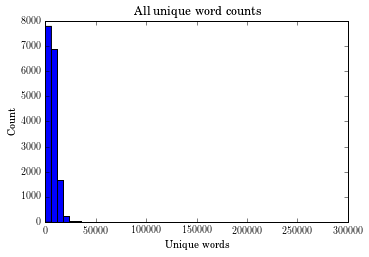

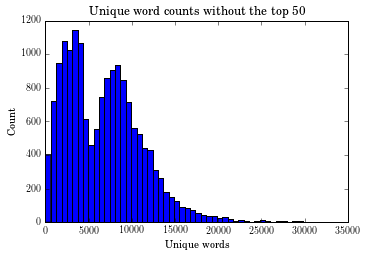

In [25]:
# check if the length information is in there...
print(Book.objects.all()[0].filename)
print(Book.objects.all()[0].length)
print(Book.objects.all()[0].numUniqWords)
print(len(Book.objects.filter(length__gte=30000,length__lte=50000,language='English',exclude=False)))
uniq_words = [book.numUniqWords for book in Book.objects.filter(language='English',exclude=False)]
print(max(uniq_words))
uniq_words.sort()
# there are some huge outliers:
print(uniq_words[-50:])

# so just look at the beginning
# plt.hist(allLengths[:-50],normed=False,bins=50)
fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.hist(uniq_words,normed=False,bins=50)
ax.set_xlabel('Unique words')
ax.set_ylabel('Count')
ax.set_title("All unique word counts")
mysavefig('unique-counts-all.pdf',date=True,folder="media/figures")

fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.hist(uniq_words[:-50],normed=False,bins=50)
ax.set_xlabel('Unique words')
ax.set_ylabel("Count")
ax.set_title("Unique word counts without the top 50")
mysavefig('unique-counts-less-top50.pdf',date=True,folder="media/figures")

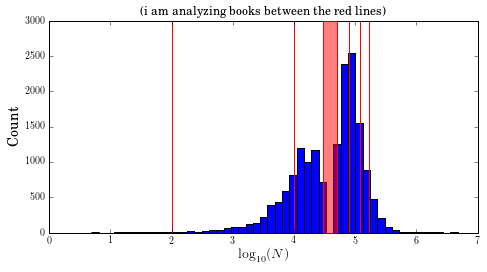

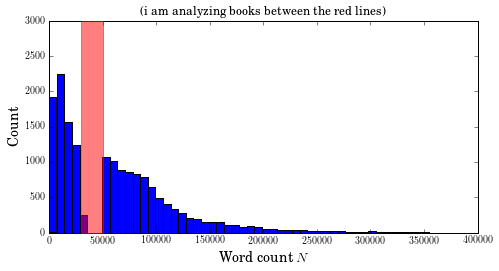

In [21]:
fig = plt.figure(figsize=(8.5,4.2))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.hist(np.log10(allLengths),normed=False,bins=50)
heights = [100,10000,30000,50000,80000,120000,170000]
for h in heights:
    ax1.plot(np.log10([h,h]),[0,3000],'r')
ax2 = fig.add_axes([0.2,0.2,0.7,0.7])
ax2.fill_between(np.log10([30000,50000]),[3000,3000],color='r',alpha=0.5,zorder=100)
ax1.set_xlabel('$\log_{10}(N)$',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax1.set_title('(i am analyzing books between the red lines)')
# mysavefig('log-distribution-book-length.svg')
# mysavefig('log-distribution-book-length.pdf',folder="media/figures")

fig = plt.figure(figsize=(8.5,4.2))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.hist(allLengths[:-100],normed=False,bins=50)
heights = [100,10000,30000,50000,80000,120000,170000]
for h in heights:
    ax1.plot(np.log10([h,h]),[0,3000],'r')
ax2 = fig.add_axes([0.2,0.2,0.7,0.7])
ax2.fill_between([30000,50000],[3000,3000],color='r',alpha=0.5,zorder=100)
ax1.set_xlabel('Word count $N$',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax1.set_title('(i am analyzing books between the red lines)')